# cu_inj Reference simulation

In [1]:
# %pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

In [1]:
from impact import Impact
from distgen import Generator
import os
from pmd_beamphysics.plot import density_and_slice_plot, slice_plot
NAME = 'impact_cu_inj_v0_300k_particles'

GFILE = os.path.expandvars('$LCLS_LATTICE/distgen/models/cu_inj/vcc_image/distgen.yaml')
# YFILE = os.path.expandvars('$LCLS_LATTICE/impact/models/cu_inj/v0/ImpactT.yaml')
infile = os.path.expandvars('$LCLS_LATTICE/impact/models/cu_inj/v0/ImpactT.in')
IFILE = os.path.expandvars(infile)

In [2]:
%%time
G = Generator(GFILE)
G['n_particle'] = 300_000
G.run()
P0 = G.particles

CPU times: user 4.39 s, sys: 1.96 s, total: 6.35 s
Wall time: 3.64 s


# MPI run 300k particles

For this many particles we will prepare an MPI run

In [3]:
# I = Impact.from_yaml(YFILE)
I = Impact(IFILE, workdir=os.path.expandvars('$SCRATCH'))
# Set initial particles
I.initial_particles = P0
I.workdir=os.path.expandvars('$SCRATCH')
## Switches for MPI
I.numprocs = 60
I.stop = 16.5
I.mpi_run

'mpirun -n {nproc} {command_mpi}'

In [4]:
# Change some things
I.header['Nx'] = 64
I.header['Ny'] = 64
I.header['Nz'] = 64

# Run on S3DF

This will run on SLAC's S3DF. Note that you must have access to a partition (allocation) for instant response.

In [5]:
 # SDF setup    
settings = { 
 'command': '/sdf/group/ad/beamphysics/software/impact-T/single_processor/ImpactTexe',    
 'command_mpi': '/sdf/group/ad/beamphysics/software/impact-T/openmpi/ImpactTexe-mpi',
 'mpi_run': 'salloc --partition milano --account ad:beamphysics -N 1 -n {nproc} /usr/lib64/openmpi/bin/mpirun -n {nproc} {command_mpi}'
}
for k, v in settings.items():
    I[k] = v
    
I.workdir = os.path.expandvars('$SCRATCH')
I.configure()
print(I)

================ Impact-T Summary ================    
300000 particles
1 bunch of electrons
total charge: 250.0000000000001 pC
Distribution type: read
Cathode start at z = 0 m
   emission time: 6.515803466731775e-12 s
   image charges neglected after z = 0.02 m
Processor domain: 4 x 15 = 60 CPUs
Space charge grid: 64 x 64 x 64
Maximum time steps: 1000000
Reference Frequency: 2856000000.0 Hz
Initial reference time: -3.249141278122655e-12 s
Simulation starting from the beginning
Impact-T configured in /sdf/scratch/users/z/zihanzhu/tmp39yaxbfo


In [6]:
%%time
I.verbose=True
I.run()

Running Impact-T in /sdf/scratch/users/z/zihanzhu/tmp39yaxbfo
salloc --partition milano --account ad:beamphysics -N 1 -n 60 /usr/lib64/openmpi/bin/mpirun -n 60 /sdf/group/ad/beamphysics/software/impact-T/openmpi/ImpactTexe-mpi
writing 300000 particles to /sdf/scratch/users/z/zihanzhu/tmp39yaxbfo/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 300000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 7.397329755843176e-12 according to initial particles
Cathode start: Replaced Tini with -3.7045312932654324e-12 according to initial particles
Setting total charge to 2.500000000000001e-10 C


salloc: Granted job allocation 43194939
salloc: Waiting for resource configuration
salloc: Nodes sdfmilan010 are ready for job


 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.2
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           29          29
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
 check randomness:           43  0.31552401189503743     
 check randomness:           44  0.83046861596908772     
 check randomness:           45  0.62715943443247690     
 check randomness:           46   4.0624936506343912E-002
 check randomness:           47   2.7156942211103430E-002
 check randomness:           48   8.0516132262056561E-002
 check randomness:           49  0.79732076163493515     
 time:    1191.1182899050000, elapsed: 1227.1034128665924873130723338, elapsed: 1221.004312753677438876

salloc: Relinquishing job allocation 43194939
salloc: Job allocation 43194939 has been revoked.


Finished.
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 26 : RMS Z information
Loaded fort 24 : RMS X information
Loaded fort 29 : Cube root of third moments of the beam distribution
Loaded fort 27 : Max amplitude information
Loaded fort 25 : RMS Y information
Loaded fort 18 : Time and energy
Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 70 : Slice information of the final distribution
Loaded fort 60 : Slice information of the initial distribution
Loading particles
Loaded fort 40 : initial particle distribution at t = 0
Loaded fort 50 : final particle distribution projected to the centroid location of the bunch
Loaded write beam particles YAG02 fort.102
Loaded write beam particles YAG03 fort.103
Loaded write beam particles OTR1 fort.105
Loaded write beam particles WS03 fort.108
Loaded write beam particles OTR3 fort.109
Converting z to t according to cathode_kinetic_energy_ref = 1.0 eV
Converted initial_particles to ParticleGrou

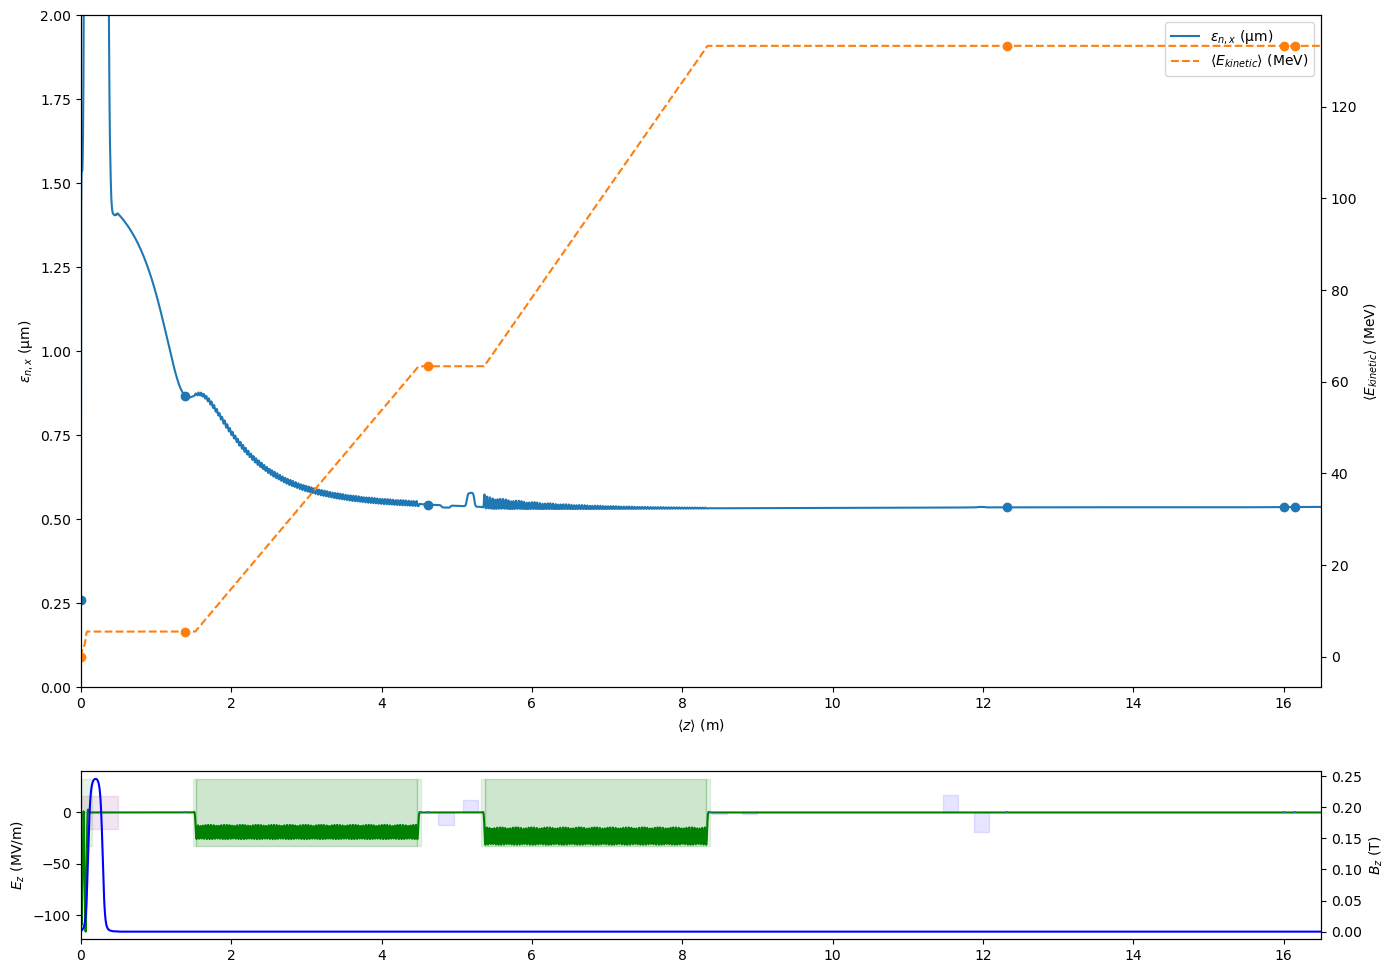

In [7]:
I.plot('norm_emit_x', y2='mean_kinetic_energy', ylim=(0, 2e-6), figsize=(16,12), include_labels=False)

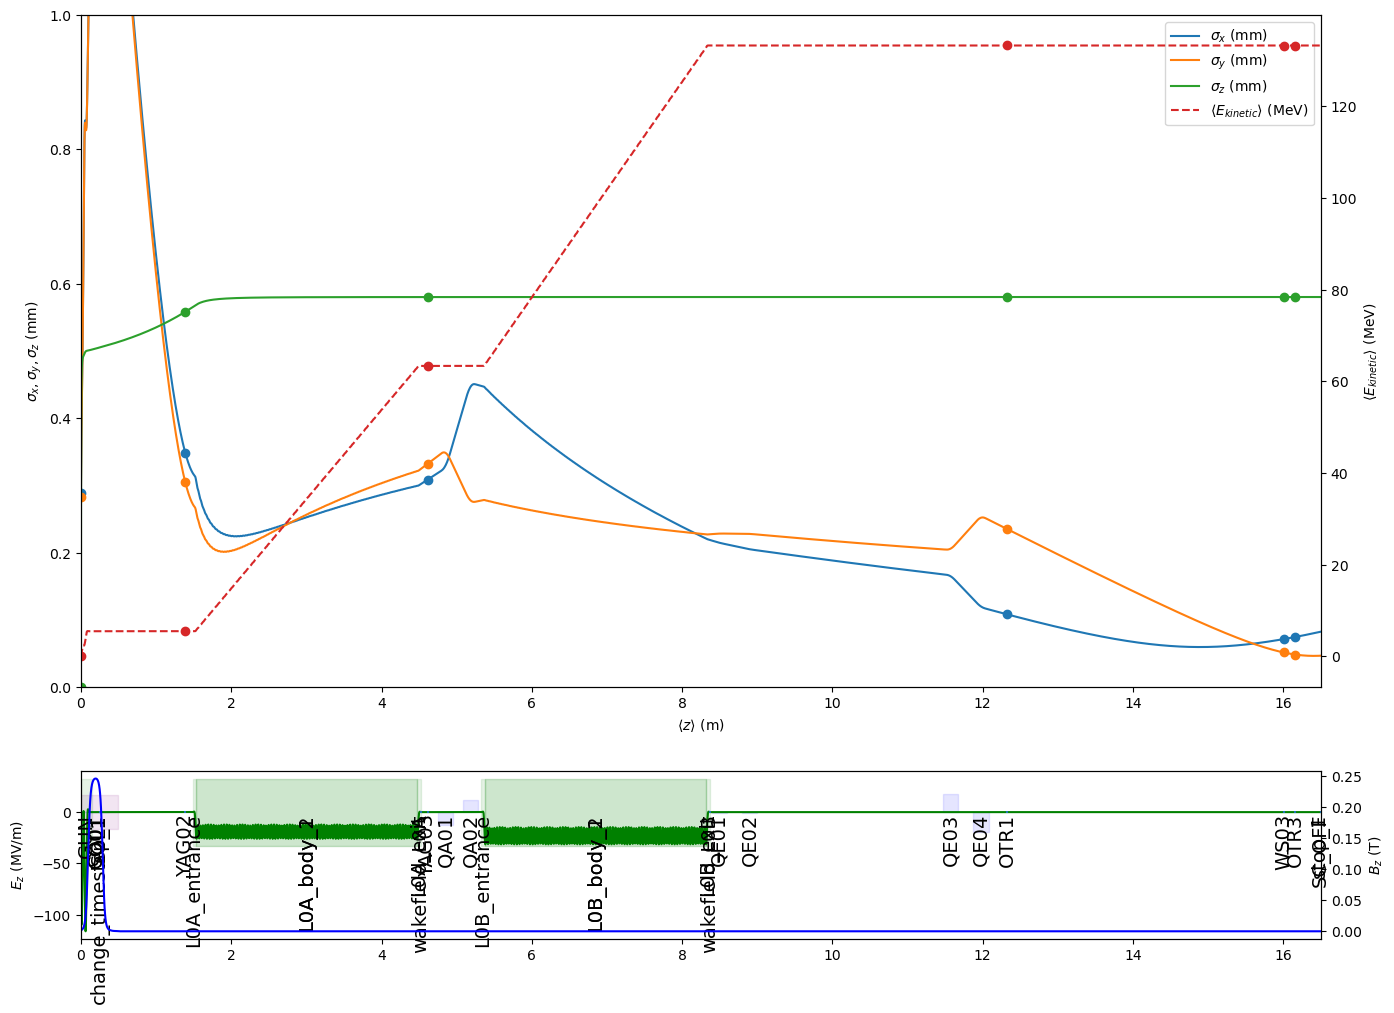

In [8]:
I.plot(['sigma_x', 'sigma_y', 'sigma_z'], y2='mean_kinetic_energy',  ylim=(0, 0.001), xlim=(0, 16.5), figsize=(16, 12), include_labels=True)

In [9]:
I.particles.keys()

dict_keys(['initial_particles', 'final_particles', 'YAG02', 'YAG03', 'OTR1', 'WS03', 'OTR3'])

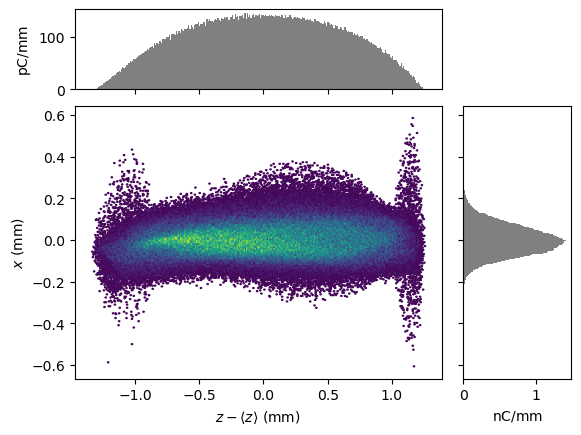

In [10]:
P1 = I.particles['OTR3']

P1.plot('delta_z', 'x')

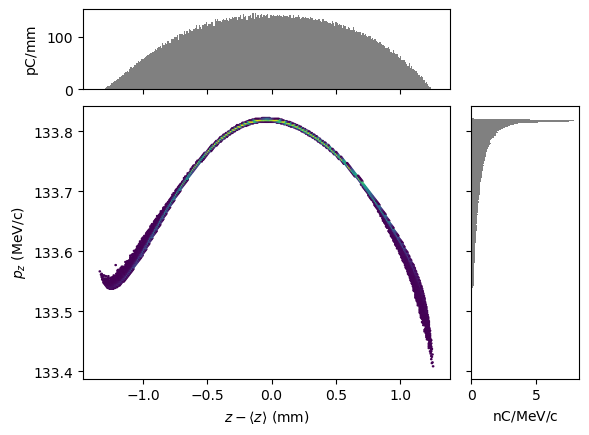

In [11]:
P1.plot('delta_z', 'pz')

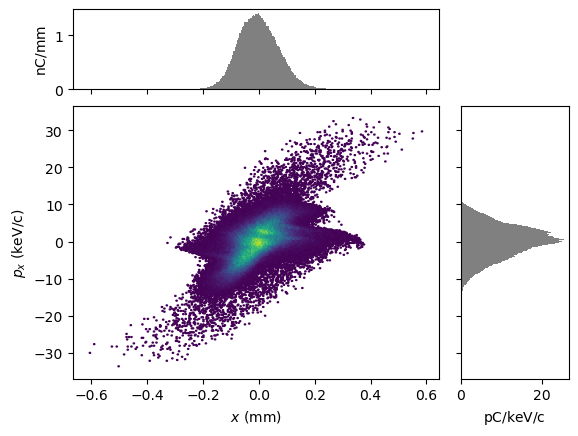

In [12]:
P1.plot('x', 'px')

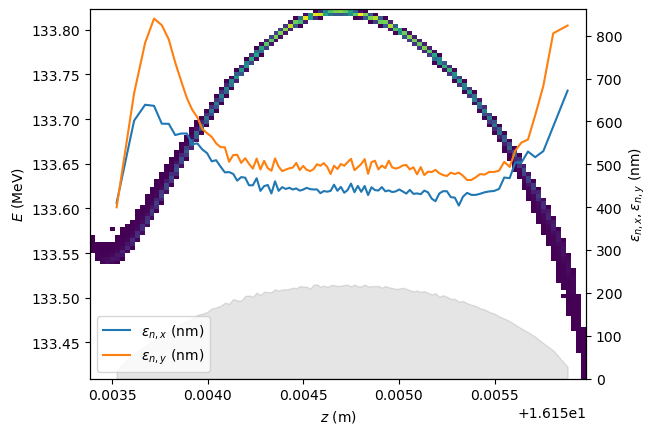

In [13]:
density_and_slice_plot(P1, 'z', 'energy', stat_keys = ['norm_emit_x', 'norm_emit_y'], n_slice = 100, bins=100)

In [14]:
# 95% Twiss and Emittance
P1.twiss('xy', 0.95)

{'alpha_x': -0.8482301152699107,
 'beta_x': 2.6727978415757505,
 'gamma_x': 0.6433312320534786,
 'emit_x': 1.5578916858081127e-09,
 'eta_x': 0.011771003749771414,
 'etap_x': 0.003211405029798702,
 'norm_emit_x': 4.0776069257456883e-07,
 'alpha_y': 0.3098999130524413,
 'beta_y': 0.898229239576974,
 'gamma_y': 1.220220749689796,
 'emit_y': 1.7692840079465431e-09,
 'eta_y': -0.004642241973772992,
 'etap_y': -0.00212987663665613,
 'norm_emit_y': 4.6309064173873216e-07}

In [15]:
PFILE0 = './linac/impact_inj_output.h5'
I.particles['final_particles'].write(PFILE0)

# Inject IMPACT output into Tao/PyTao

In [16]:
from pytao import Tao
from pmd_beamphysics import ParticleGroup

## Parameters

In [36]:
TRACK_START = "OTR3" # Where to start particle tracking (injection element)
TRACK_END = "BC1CEND" # Where to end particle tracking

# Get particles from Lume-Impact sc_inj model, e.g.: 
# I.particles['final_particles'].write('impact_particles_at_14m.h5')

PFILE0 = './linac/impact_inj_output.h5'

# File to write
PFILE = f'bmad_particles_at_{TRACK_START}.h5' 

# Twiss Match parameters (optional) 
twiss_match = True
beta_x0  =  17.2
alpha_x0 = -4.8
beta_y0  =  17.2
alpha_y0 = -4.8

## Initialize Tao and get reference time

### Running BMAD Simulations with Graphical Output on S3DF Jupyter Notebook

To run BMAD simulations with graphical output on S3DF Jupyter Notebook, follow these steps:

1. **Find the Hostname:**
   - Run the command `hostname` to find out the hostname of the machine where the Jupyter is running.
2. **Establish SSH Connection with X11 Forwarding:**
   - From your local machine, use SSH with X11 forwarding enabled:
     ```bash
     ssh -Y <your-username>@<remote-hostname>
     ```
     For example:
     ```bash
     ssh -Y zihanzhu@s3dflogin
     ```
   - Then, SSH to the specific iana node:
     ```bash
     ssh -Y zihanzhu@sdfiana008
     ```
   - Retrieve the DISPLAY variable using:
     ```bash
     echo $DISPLAY
     ```
3. **Set DISPLAY Environment Variable in Notebook:**
   - Back to Jupyter, set the DISPLAY environment variable in the notebook:
     ```bash
     %env DISPLAY=<DISPLAY variable>
     ```
Now, the graphical interface should appear when you run BMAD with Tao/PyTao. Special thanks to Michael Enrlichman for guidance.



In [37]:
%env DISPLAY=:44.0

env: DISPLAY=:44.0


In [38]:
tao = Tao('-lat $LCLS_LATTICE/bmad/models/cu_hxr/cu_hxr.lat.bmad')

In [39]:
tao = Tao(f'-init $LCLS_LATTICE/bmad/models/cu_hxr/tao.init -slice BEGINNING:{TRACK_END}')
tao.cmd('place floor sigmaxy')


[]

In [40]:
t_ref = tao.evaluate(f'ele::{TRACK_START}[ref_time]')[0]

t_ref

5.3908170280909494e-08

# Prepare particles

In [41]:
P = ParticleGroup(PFILE0)

# Change to s-coordinates (different times t, constant z)
P.drift_to_z() # drift to P['mean_z']

# Zero out the mean time
P.t += t_ref -P['mean_t']

if twiss_match:
    P.twiss_match(beta =  beta_x0  , alpha =alpha_x0, plane = 'x', inplace = True)
    P.twiss_match(beta =  beta_y0  , alpha =alpha_y0, plane = 'y', inplace = True)

# Write the file that Tao will read
P.write(PFILE)

# Check particles

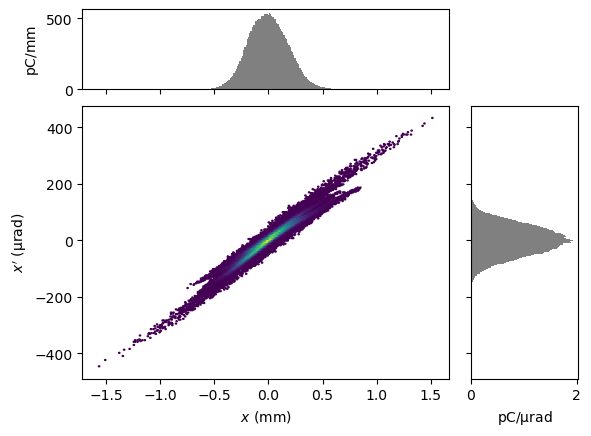

In [42]:
P.plot('x', 'xp')

In [43]:
P['mean_t']

5.390817028090951e-08

In [44]:
P.twiss('xy')

{'alpha_x': -4.7717552743680285,
 'beta_x': 17.091554720199873,
 'gamma_x': 1.3907247636381865,
 'emit_x': 2.037207146400394e-09,
 'eta_x': 0.038769857606549545,
 'etap_x': 0.0104685548628265,
 'norm_emit_x': 5.332093432748933e-07,
 'alpha_y': -4.78521702683941,
 'beta_y': 17.14868190306229,
 'gamma_y': 1.3935941041443083,
 'emit_y': 2.5416339290547224e-09,
 'eta_y': -0.029484444392097645,
 'etap_y': -0.008359850072592332,
 'norm_emit_y': 6.652357177084527e-07}

# # Set initial beam 

In [45]:
tao.cmd('set global plot_on = F')
tao.cmd('set global lattice_calc_on = F')
tao.cmd(f'set beam_init position_file = {PFILE}')
tao.cmd(f'set beam_init track_start = {TRACK_START}')
tao.cmd(f'set beam_init track_end = {TRACK_END}')
tao.cmd(f'set beam_init bunch_charge = {P.charge}')
tao.cmd(f'set beam_init n_particle = {len(P)}')
tao.cmd('set global lattice_calc_on = T')
tao.cmd('set global plot_on = T')

[]

# Track

In [46]:
# Toggle beam
# tao.cmd('set global track_type = beam;set global track_type = single') 
tao.cmd('set global track_type = beam') # default mode is "single"

[]

# Get partices at end

In [47]:
P1 = ParticleGroup(data=tao.bunch_data('BC1CEND'))

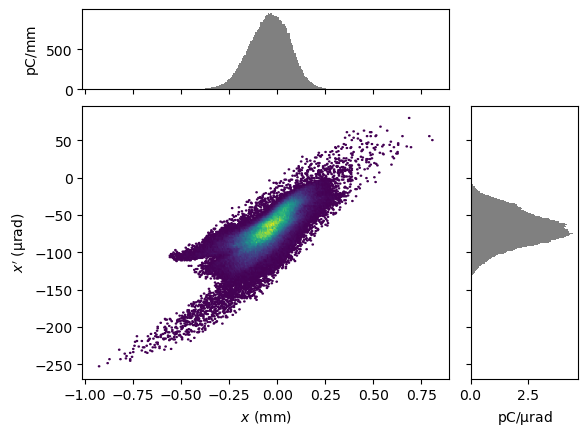

In [48]:
P1.plot('x', 'xp')

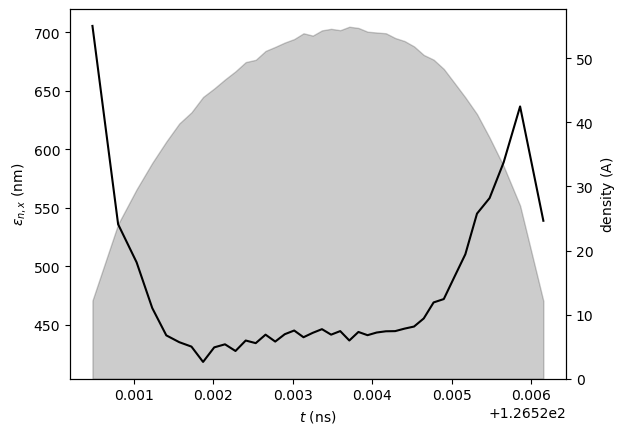

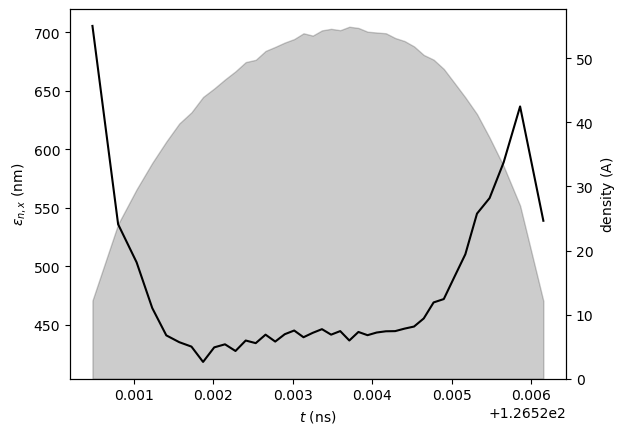

In [49]:
slice_plot(P1, 'norm_emit_x', slice_key='t')

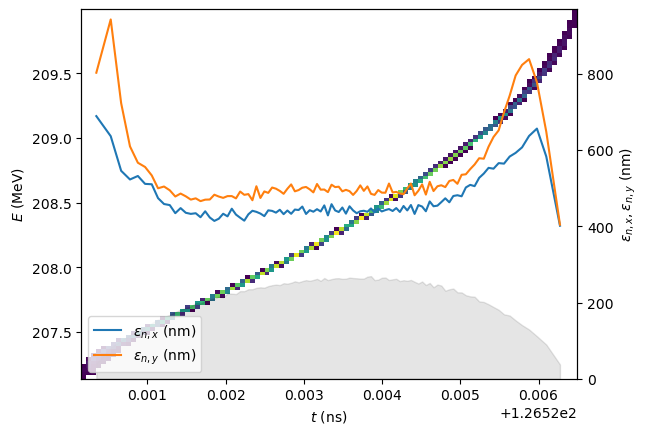

In [50]:
density_and_slice_plot(P1, 't', 'energy', stat_keys = ['norm_emit_x', 'norm_emit_y'], n_slice = 100, bins=100)

## Plot

In [51]:
%%tao
x-a all s
sc

-------------------------
Tao> x-a all s
-------------------------
Tao> sc
-------------------------
Tao> 
